# PLAN - PHASE 2

0. [x] Get the data.
0. [x] Prepare the data for exploration.
0. [x] Split the data into train and test sets.
0. [ ] Explore the data.
0. [x] Do cross-validation with the data.
0. [x] Code and evaluate several models.
0. [ ] Evaluate out of sample data (test set).

# ENVIRONMENT

In [1]:
# basic ewnvironment and custom scripts
import os
import acquire
import prepare
import explore

# numpy and pandas for dataframe building and manipulation
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import operator

# matplotlib and seaborn for visualization
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# import preprocessing for scaling and splitting
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# sklearn machine learning
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# conda install -c glemaitre imbalanced-learn
from imblearn.ensemble import BalancedBaggingClassifier

# to explode the DataFrames and avoid truncation
pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# ACQUISITION

In [2]:
# utilize acquire script to get primary dataframe for analysis
dfa, dfb = acquire.get_data()

## _'dfa' : this is the dataframe with the NAW (Not Abused Woman) & AW (Abused Woman) cases._

In [3]:
dfa.shape

(705, 44)

## _'dfb' : this is the dataframe with the AW (Abused Woman) cases_

In [4]:
dfb.shape

(497, 29)

In [5]:
# placeholder cell: perhaps going to utilize these in a later phase

# df9 & 10 are cases of AW (Abused Woman)
df9 = acquire.read_data('data09.csv')
df10 = acquire.read_data('data10.csv')

# df 13, 14 & 15 are cases of HOMICIDE
df13 = acquire.read_data('data13.csv')
df14 = acquire.read_data('data14.csv')
df15 = acquire.read_data('data15.csv')

# PREPARATION

## _Examining the dataframes, dfa & dfb, for any missing or inconsistent values._

In [6]:
dfa.head(8).T

,0,1,2,3,4,5,6,7
CASEID,108395,108397,108399,108443,108444,108456,108460,108525
ABUSED,1,1,1,1,1,1,1,1
SCRSTATR,1,1,1,1,1,1,1,1
LENGTHC1,1,2,5,2,2,2,3,4
C1SITUAT,1,1,1,1,1,3,1,4
PABUSE,1,1,1,1,1,1,1,3
D3RCHILT,1,0,6,0,1,1,1,2
E13PRGNT,3,3,3,1,2,3,888,3
N7PREGNT,2,3,2,2,2,2,1,2
TOTSUPRT,9,11,9,12,11,2,10,11


In [7]:
dfb.head(8).T

,0,1,2,3,4,5,6,7
CASEID,108395,108397,108399,108443,108444,108456,108460,108525
M5FIRED,9999,9999,9999,9999,9999,9999,9999,1
M11HIGH,2,2,2,2,1,1,2,2
M35SAFE,1,1,1,1,1,1,1,1
M41ILLGL,2,2,2,2,2,2,2,1
M42DAGRR,0,0,0,0,0,1,0,1
M13TALKR,1,1,1,1,1,1,1,1
M32OTHER,99,99,99,13,99,11,11,41
M27HOW,99999,99999,99999,99999,99999,11,99999,21
M30ARRES,3,3,3,3,3,0,3,1


In [8]:
prepare.get_nulls_by_column(dfa)

Empty DataFrame
Columns: [sum_nulls, nulls_by_percent]
Index: []


In [9]:
prepare.get_nulls_by_column(dfb)

Empty DataFrame
Columns: [sum_nulls, nulls_by_percent]
Index: []


In [10]:
prepare.get_nulls_by_row(dfa)

In [11]:
prepare.get_nulls_by_row(dfb)

In [12]:
prepare.summarize_data(dfa)

HEAD
   CASEID  ABUSED  SCRSTATR  LENGTHC1  C1SITUAT  PABUSE  D3RCHILT  E13PRGNT  \
0  108395       1         1         1         1       1         1         3   
1  108397       1         1         2         1       1         0         3   
2  108399       1         1         5         1       1         6         3   
3  108443       1         1         2         1       1         0         1   
4  108444       1         1         2         1       1         1         2   

   N7PREGNT  TOTSUPRT    ...     N16CHILD  N17ARRST  N1FRQNCY  N2SVRITY  \
0         2         9    ...            2         2         2         2   
1         3        11    ...            2         1         2         1   
2         2         9    ...            2         2         2         2   
3         2        12    ...            2         1         2         2   
4         2        11    ...            2         1         1         1   

   N3WEAPON  N4CHOKE  N5SEX  N6CONTRL  N8JEALUS  N10CPBLE  
0        

In [13]:
prepare.summarize_data(dfb)

HEAD
   CASEID  M5FIRED  M11HIGH  M35SAFE  M41ILLGL  M42DAGRR  M13TALKR  M32OTHER  \
0  108395     9999        2        1         2         0         1        99   
1  108397     9999        2        1         2         0         1        99   
2  108399     9999        2        1         2         0         1        99   
3  108443     9999        2        1         2         0         1        13   
4  108444     9999        1        1         2         0         1        99   

   M27HOW  M30ARRES    ...     FORCEDR  MISCARR  RESTRAIN  CHOKED  NDRUNK  \
0   99999         3    ...           0        0         0       0       0   
1   99999         3    ...           0        0         0       1       2   
2   99999         3    ...           0        0         1       1       0   
3   99999         3    ...           0        0         0       1       1   
4   99999         3    ...           0        0         0       0       3   

   RDRUNK  BOTHDRUN  NDRUGS  RDRUGS  BOTHDRUG  
0  

## _We will utilize the first dataframe's Case IDs to group our incident data from set 10 to group by incident and identify surveyed individuals that were victim to more than one instance of abuse_

In [14]:
dfa['RECID'] = dfa.CASEID.apply(prepare.get_repeat_case)

## _This new column, RECID, is a boolean value that tells us whether the cases were re-assault cases or not._

In [15]:
# look at unaltered value counts
prepare.value_counts(dfa)

CASEID

-------------------------------------------------------------

ABUSED
1    497
2    208
Name: ABUSED, dtype: int64

-------------------------------------------------------------

SCRSTATR
1      455
2      118
3      115
999     17
Name: SCRSTATR, dtype: int64

-------------------------------------------------------------

LENGTHC1
1    159
2    153
3     83
4    105
5    147
6     58
Name: LENGTHC1, dtype: int64

-------------------------------------------------------------

C1SITUAT
1    395
2     18
3     74
4     10
9    208
Name: C1SITUAT, dtype: int64

-------------------------------------------------------------

PABUSE
1    464
2     27
3      6
9    208
Name: PABUSE, dtype: int64

-------------------------------------------------------------

D3RCHILT
0      339
1      136
2      113
3       57
4       32
5        9
6        9
7        5
12       1
555      1
666      1
999      2
Name: D3RCHILT, dtype: int64

-----------------------------------------------------------

In [16]:
# change dfa to df to match conventions of prepare.py
df = dfa
#use prepare function to rename features 
dfa = prepare.rename_columns_all(df)
# dfa = df

In [17]:
dfa.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder,reassault
0,108395,1,1,1,1,1,1,3,2,9,...,2,2,2,2,2,2,2,2,2,0
1,108397,1,1,2,1,1,0,3,3,11,...,1,2,1,1,1,1,2,1,1,1
2,108399,1,1,5,1,1,6,3,2,9,...,2,2,2,2,1,2,2,2,2,1
3,108443,1,1,2,1,1,0,1,2,12,...,1,2,2,1,1,2,1,2,2,0
4,108444,1,1,2,1,1,1,2,2,11,...,1,1,1,2,2,2,2,2,2,1


In [18]:
#use prepare function to rename features 
prepare.rename_columns_recid(dfb)

In [19]:
dfb.head()

,id,gun_fired,anyone_high,safe_place,forced_illegal,life_danger,talk_about_it,left_or_not,medical_staff_helpful,perp_arrested_ever,...,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_perp_drunk,num_woman_drunk,num_both_drunk,num_perp_drugs,num_woman_drugs,num_both_drugs
0,108395,9999,2,1,2,0,1,99,99999,3,...,0,0,0,0,0,0,0,0,0,0
1,108397,9999,2,1,2,0,1,99,99999,3,...,0,0,0,1,2,0,0,0,0,0
2,108399,9999,2,1,2,0,1,99,99999,3,...,0,0,1,1,0,0,0,0,0,0
3,108443,9999,2,1,2,0,1,13,99999,3,...,0,0,0,1,1,0,0,0,0,0
4,108444,9999,1,1,2,0,1,99,99999,3,...,0,0,0,0,3,0,0,0,0,0


In [20]:
# run function to replace nonvalues and change values to conventionally boolean archetypes
prepare.replace_nonvals_all(dfa)

In [21]:
# run function to replace nonvalues and change values to conventionally boolean archetypes
prepare.replace_nonvals_recid(dfb)

In [22]:
dfa

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder,reassault
0,108395,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108397,1,1,2,1,1,0,0,0,11,...,1,0,1,1,1,1,0,1,1,1
2,108399,1,1,5,1,1,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,108443,1,1,2,1,1,0,1,0,12,...,1,0,0,1,1,0,1,0,0,0
4,108444,1,1,2,1,1,1,0,0,11,...,1,1,1,0,0,0,0,0,0,1
5,108456,1,1,2,0,1,1,0,0,0,...,1,0,0,0,1,1,0,1,1,1
6,108460,1,1,3,1,1,1,0,1,10,...,0,0,0,0,0,0,0,1,1,1
7,108525,1,1,4,1,2,2,0,0,11,...,1,1,1,1,1,1,1,1,1,1
8,108562,1,1,5,1,1,2,0,0,11,...,0,0,0,1,0,0,1,1,1,1
9,109304,0,0,5,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dfa = dfa[dfa.abuse_past_year == 1]

In [24]:
dfa.columns

Index(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'guns_in_home',
       'jealous_past_year', 'limit_family_contact', 'location_tracking',
       'threat_hit', 'thrown_object', 'push_shove', 'slap', 'kick_punch',
       'hit_object', 'beaten', 'choked', 'threat_knife', 'threat_gun',
       'rape_with_threat', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'partner_drug_use', 'partner_alcohol_use', 'threat_suicide',
       'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'weapon_ever',
       'choked_ever', 'rape_ever', 'controlled_ever', 'jealous',
       'capable_murder', 'reassault'],
      dtype='object')

In [25]:
dfa = dfa.drop(columns=['guns_in_home',
                        'threat_hit',
                        'beaten',
                        'choked',
                        'threat_knife',
                        'threat_gun',
                        'rape_with_threat',
                        'partner_drug_use',
                        'partner_alcohol_use',
                        'weapon_ever',
                        'choked_ever',
                        'jealous_past_year'
                       ])

In [26]:
dfa.shape

(497, 33)

In [27]:
dfb.columns

Index(['id', 'gun_fired', 'anyone_high', 'safe_place', 'forced_illegal',
       'life_danger', 'talk_about_it', 'left_or_not', 'medical_staff_helpful',
       'perp_arrested_ever', 'police_resp', 'order_protection',
       'level_severity', 'num_incidents', 'num_threats', 'num_slapping',
       'num_punching', 'num_beating', 'num_weapon', 'num_forced_sex',
       'miscarriage_resulted', 'restrained_by_perp', 'num_choked',
       'num_perp_drunk', 'num_woman_drunk', 'num_both_drunk', 'num_perp_drugs',
       'num_woman_drugs', 'num_both_drugs'],
      dtype='object')

In [28]:
dfb = dfb.drop(columns=['police_resp',
                        'order_protection',
                        'num_woman_drunk',
                        'num_perp_drunk',
                        'num_woman_drugs',
                        'num_perp_drugs',
                       ])

In [29]:
dfb.shape

(497, 23)

In [30]:
dfa.reassault.value_counts()

1    350
0    147
Name: reassault, dtype: int64

## _Merge dfa and dfb on ID._

In [31]:
dfb = dfa.merge(right=dfb, on='id')

In [32]:
dfb.shape

(497, 55)

In [33]:
dfb.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,num_slapping,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_both_drunk,num_both_drugs
0,108395,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,108397,1,1,2,1,1,0,0,0,11,...,1,0,0,0,0,0,0,1,0,0
2,108399,1,1,5,1,1,2,0,0,0,...,1,0,1,0,0,0,1,1,0,0
3,108443,1,1,2,1,1,0,1,0,12,...,0,0,1,0,0,0,0,1,0,0
4,108444,1,1,2,1,1,1,0,0,11,...,3,0,0,0,0,0,0,0,0,0


In [34]:
dfb.columns

Index(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'limit_family_contact',
       'location_tracking', 'thrown_object', 'push_shove', 'slap',
       'kick_punch', 'hit_object', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'threat_suicide', 'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'rape_ever',
       'controlled_ever', 'jealous', 'capable_murder', 'reassault',
       'gun_fired', 'anyone_high', 'safe_place', 'forced_illegal',
       'life_danger', 'talk_about_it', 'left_or_not', 'medical_staff_helpful',
       'perp_arrested_ever', 'level_severity', 'num_incidents', 'num_threats',
       'num_slapping', 'num_punching', 'num_beating', 'num_weapon',
       'num_forced_sex', 'miscarriage_resulted', 'restrained_by_perp'

In [35]:
dfb.head(5).T

,0,1,2,3,4
id,108395,108397,108399,108443,108444
abuse_past_year,1,1,1,1,1
abuse_status,1,1,1,1,1
length_relationship,1,2,5,2,2
partner_abusive,1,1,1,1,1
num_abusers,1,1,1,1,1
num_children,1,0,2,0,1
pregnant,0,0,0,1,0
beaten_while_pregnant,0,0,0,0,0
support_score,0,11,0,12,11


In [36]:
dfb.reassault.value_counts()

1    350
0    147
Name: reassault, dtype: int64

In [37]:
prepare.get_nulls_by_column(dfb)

Empty DataFrame
Columns: [sum_nulls, nulls_by_percent]
Index: []


## Train / Test Split

In [38]:
X = dfb.drop(columns=['reassault'])
y = dfb[['reassault']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 0, stratify=y)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [39]:
train_df.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_both_drunk,num_both_drugs,reassault
113,308002,1,1,2,1,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
320,508089,1,0,5,1,1,0,0,1,0,...,4,3,0,0,0,0,99,0,0,1
163,308153,1,1,1,1,1,0,0,0,12,...,1,2,0,1,0,0,1,0,0,1
51,148350,1,1,4,1,1,0,0,0,11,...,1,0,0,0,0,0,0,0,0,0
388,508650,1,1,5,1,1,0,0,0,6,...,0,0,1,0,0,0,0,0,1,0


In [40]:
test_df.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_both_drunk,num_both_drugs,reassault
397,618256,1,1,4,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
247,308492,1,1,4,1,1,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0
262,318488,1,0,2,1,1,1,0,0,12,...,0,0,0,0,0,0,0,0,0,0
453,708501,1,1,6,1,1,2,0,1,0,...,0,1,0,2,0,0,0,0,0,1
487,808552,1,0,3,1,1,2,0,0,12,...,2,4,0,0,0,0,99,0,0,1


# EXPLORATION

In [41]:
def plot_hist(df):
    """
    Plots the distribution of the dataframe's variables.
    """
    df.hist(figsize=(24, 20), bins=20)

In [42]:
df = dfb.copy()

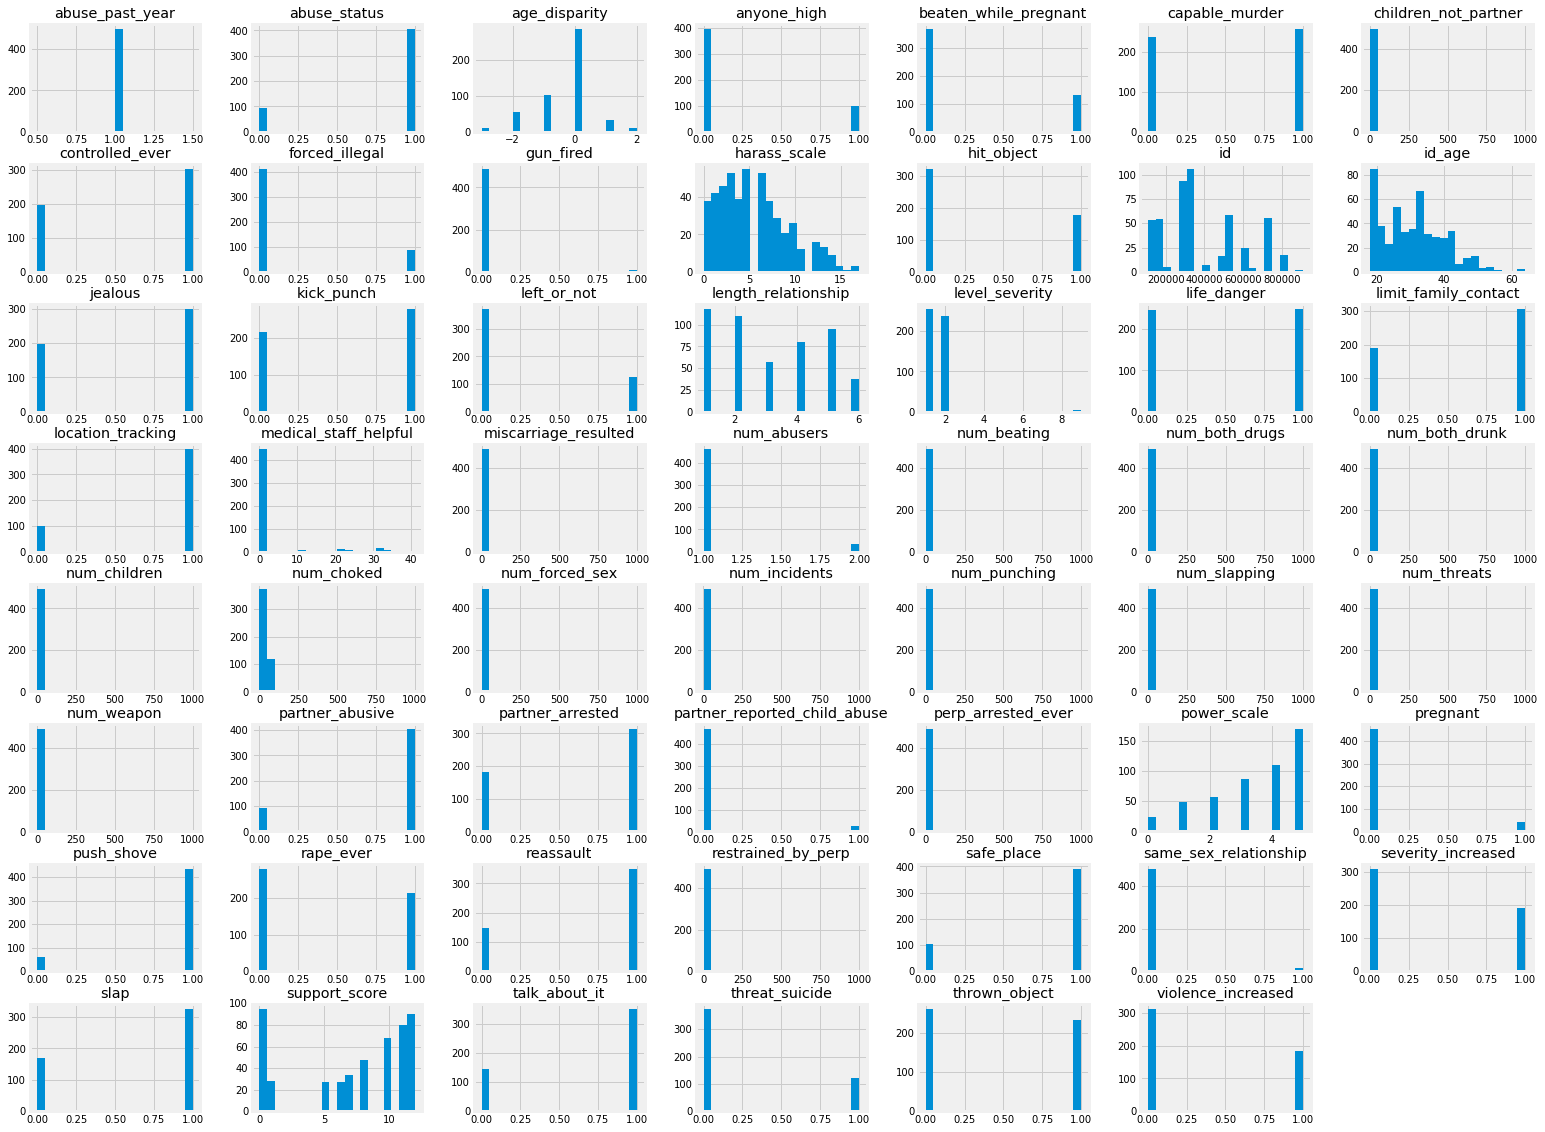

In [43]:
plot_hist(df)

# ---------- DO NOT TOUCH ABOVE ----------

In [44]:
df.reassault.value_counts()

1    350
0    147
Name: reassault, dtype: int64

In [45]:
df.columns

Index(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'limit_family_contact',
       'location_tracking', 'thrown_object', 'push_shove', 'slap',
       'kick_punch', 'hit_object', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'threat_suicide', 'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'rape_ever',
       'controlled_ever', 'jealous', 'capable_murder', 'reassault',
       'gun_fired', 'anyone_high', 'safe_place', 'forced_illegal',
       'life_danger', 'talk_about_it', 'left_or_not', 'medical_staff_helpful',
       'perp_arrested_ever', 'level_severity', 'num_incidents', 'num_threats',
       'num_slapping', 'num_punching', 'num_beating', 'num_weapon',
       'num_forced_sex', 'miscarriage_resulted', 'restrained_by_perp'

In [46]:
# we will refer to this list of variables as 'keep'
keep = list(df.columns)


In [47]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 113 to 403
Data columns (total 55 columns):
id                              422 non-null int64
abuse_past_year                 422 non-null int64
abuse_status                    422 non-null int64
length_relationship             422 non-null int64
partner_abusive                 422 non-null int64
num_abusers                     422 non-null int64
num_children                    422 non-null int64
pregnant                        422 non-null int64
beaten_while_pregnant           422 non-null int64
support_score                   422 non-null int64
limit_family_contact            422 non-null int64
location_tracking               422 non-null int64
thrown_object                   422 non-null int64
push_shove                      422 non-null int64
slap                            422 non-null int64
kick_punch                      422 non-null int64
hit_object                      422 non-null int64
power_scale               

In [48]:
keep

['id',
 'abuse_past_year',
 'abuse_status',
 'length_relationship',
 'partner_abusive',
 'num_abusers',
 'num_children',
 'pregnant',
 'beaten_while_pregnant',
 'support_score',
 'limit_family_contact',
 'location_tracking',
 'thrown_object',
 'push_shove',
 'slap',
 'kick_punch',
 'hit_object',
 'power_scale',
 'harass_scale',
 'id_age',
 'age_disparity',
 'children_not_partner',
 'same_sex_relationship',
 'threat_suicide',
 'partner_reported_child_abuse',
 'partner_arrested',
 'violence_increased',
 'severity_increased',
 'rape_ever',
 'controlled_ever',
 'jealous',
 'capable_murder',
 'reassault',
 'gun_fired',
 'anyone_high',
 'safe_place',
 'forced_illegal',
 'life_danger',
 'talk_about_it',
 'left_or_not',
 'medical_staff_helpful',
 'perp_arrested_ever',
 'level_severity',
 'num_incidents',
 'num_threats',
 'num_slapping',
 'num_punching',
 'num_beating',
 'num_weapon',
 'num_forced_sex',
 'miscarriage_resulted',
 'restrained_by_perp',
 'num_choked',
 'num_both_drunk',
 'num_both

In [49]:
keep.remove('id')
keep.remove('length_relationship')
keep.remove('id_age')
keep.remove('reassault')

In [50]:
# add the continuous variables into their own list
continuous_vars = ['length_relationship', 'id_age']

In [51]:
keep

['abuse_past_year',
 'abuse_status',
 'partner_abusive',
 'num_abusers',
 'num_children',
 'pregnant',
 'beaten_while_pregnant',
 'support_score',
 'limit_family_contact',
 'location_tracking',
 'thrown_object',
 'push_shove',
 'slap',
 'kick_punch',
 'hit_object',
 'power_scale',
 'harass_scale',
 'age_disparity',
 'children_not_partner',
 'same_sex_relationship',
 'threat_suicide',
 'partner_reported_child_abuse',
 'partner_arrested',
 'violence_increased',
 'severity_increased',
 'rape_ever',
 'controlled_ever',
 'jealous',
 'capable_murder',
 'gun_fired',
 'anyone_high',
 'safe_place',
 'forced_illegal',
 'life_danger',
 'talk_about_it',
 'left_or_not',
 'medical_staff_helpful',
 'perp_arrested_ever',
 'level_severity',
 'num_incidents',
 'num_threats',
 'num_slapping',
 'num_punching',
 'num_beating',
 'num_weapon',
 'num_forced_sex',
 'miscarriage_resulted',
 'restrained_by_perp',
 'num_choked',
 'num_both_drunk',
 'num_both_drugs']

In [52]:
# we will run chi-squared tests on our categorical variables in order to get a grasp of importance
sig_feats, sig_dict = explore.get_chi_squared(train_df, keep, 'reassault')

abuse_status
Dependent (reject H0)
-----------------------
num_abusers
Dependent (reject H0)
-----------------------
beaten_while_pregnant
Dependent (reject H0)
-----------------------
support_score
Dependent (reject H0)
-----------------------
limit_family_contact
Dependent (reject H0)
-----------------------
location_tracking
Dependent (reject H0)
-----------------------
thrown_object
Dependent (reject H0)
-----------------------
push_shove
Dependent (reject H0)
-----------------------
slap
Dependent (reject H0)
-----------------------
kick_punch
Dependent (reject H0)
-----------------------
hit_object
Dependent (reject H0)
-----------------------
power_scale
Dependent (reject H0)
-----------------------
harass_scale
Dependent (reject H0)
-----------------------
threat_suicide
Dependent (reject H0)
-----------------------
partner_arrested
Dependent (reject H0)
-----------------------
violence_increased
Dependent (reject H0)
-----------------------
severity_increased
Dependent (reject

In [53]:
df.shape

(497, 55)

In [54]:
features = [item[0] for item in explore.sort_sigs(sig_dict)]

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


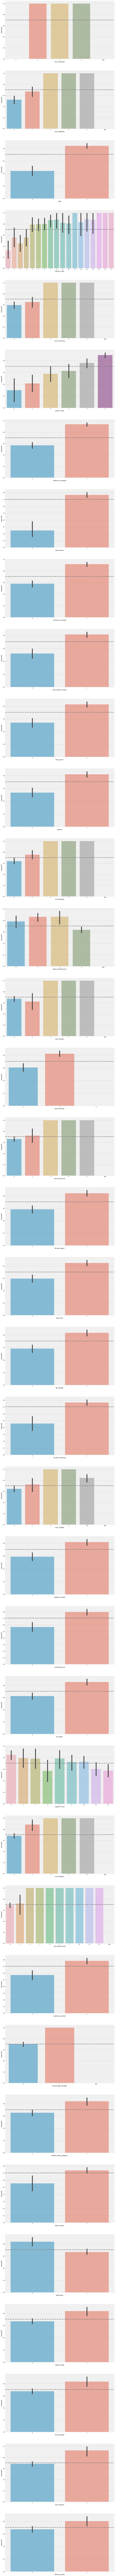

In [55]:
explore.make_bars(train_df, 'reassault', features)

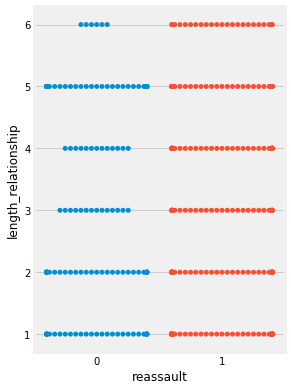

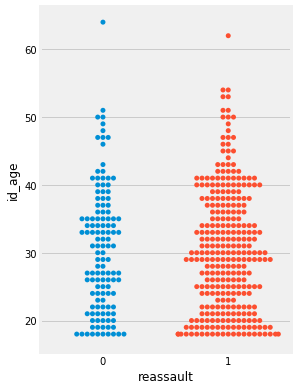

In [56]:
explore.swarrrm(train_df, 'reassault', continuous_vars)

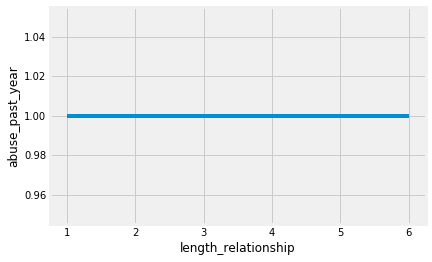

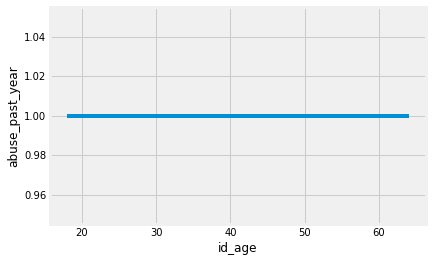

In [57]:
for feature in continuous_vars:
    sns.lineplot(x=feature, y='abuse_past_year', data=train_df)
    plt.show()

In [58]:
sig_feats

['abuse_status',
 'num_abusers',
 'beaten_while_pregnant',
 'support_score',
 'limit_family_contact',
 'location_tracking',
 'thrown_object',
 'push_shove',
 'slap',
 'kick_punch',
 'hit_object',
 'power_scale',
 'harass_scale',
 'threat_suicide',
 'partner_arrested',
 'violence_increased',
 'severity_increased',
 'rape_ever',
 'controlled_ever',
 'jealous',
 'capable_murder',
 'anyone_high',
 'safe_place',
 'forced_illegal',
 'life_danger',
 'perp_arrested_ever',
 'level_severity',
 'num_incidents',
 'num_threats',
 'num_slapping',
 'num_punching',
 'num_beating',
 'num_weapon',
 'num_forced_sex',
 'miscarriage_resulted',
 'num_choked',
 'num_both_drunk']

In [59]:
sig_dict

{'abuse_status': 9.704294033829965,
 'num_abusers': 6.159556771485706,
 'beaten_while_pregnant': 12.994761374376118,
 'support_score': 22.078914649439675,
 'limit_family_contact': 39.98562450889354,
 'location_tracking': 29.185471022084464,
 'thrown_object': 32.22999380233009,
 'push_shove': 56.12842464562466,
 'slap': 71.0620154167091,
 'kick_punch': 39.71682071678981,
 'hit_object': 23.189282316840345,
 'power_scale': 64.41779831411458,
 'harass_scale': 69.08081019626938,
 'threat_suicide': 5.537010001727068,
 'partner_arrested': 20.151130647895123,
 'violence_increased': 62.24433692480359,
 'severity_increased': 51.3864041066295,
 'rape_ever': 30.975090698846447,
 'controlled_ever': 24.621267752664686,
 'jealous': 38.377752860073606,
 'capable_murder': 25.309867696742636,
 'anyone_high': 8.43641280095156,
 'safe_place': 9.207303054257993,
 'forced_illegal': 6.613314260211461,
 'life_danger': 30.895480861912226,
 'perp_arrested_ever': 34.28970660360349,
 'level_severity': 33.70063608

In [60]:
import operator
val_list = []
for key in sig_dict:
    val_list.append(sig_dict[key])
sorted_vals = sorted(sig_dict.items(), key=operator.itemgetter(1), reverse=True) 
sorted_vals

[('num_incidents', 422.00000000000006),
 ('num_slapping', 93.299102228676),
 ('slap', 71.0620154167091),
 ('harass_scale', 69.08081019626938),
 ('num_punching', 67.03395082033755),
 ('power_scale', 64.41779831411458),
 ('violence_increased', 62.24433692480359),
 ('push_shove', 56.12842464562466),
 ('severity_increased', 51.3864041066295),
 ('limit_family_contact', 39.98562450889354),
 ('kick_punch', 39.71682071678981),
 ('jealous', 38.377752860073606),
 ('num_beating', 37.55560032563963),
 ('perp_arrested_ever', 34.28970660360349),
 ('num_threats', 33.890842577100244),
 ('level_severity', 33.70063608562691),
 ('num_forced_sex', 33.672522444301165),
 ('thrown_object', 32.22999380233009),
 ('rape_ever', 30.975090698846447),
 ('life_danger', 30.895480861912226),
 ('location_tracking', 29.185471022084464),
 ('num_choked', 26.468335812071995),
 ('capable_murder', 25.309867696742636),
 ('controlled_ever', 24.621267752664686),
 ('hit_object', 23.189282316840345),
 ('support_score', 22.0789146

# ---------- DO NOT TOUCH BELOW ----------

# MODELING

In [61]:
df = dfb.copy()

In [62]:
df.shape

(497, 55)

In [63]:
df.head(8).T

,0,1,2,3,4,5,6,7
id,108395,108397,108399,108443,108444,108456,108460,108525
abuse_past_year,1,1,1,1,1,1,1,1
abuse_status,1,1,1,1,1,1,1,1
length_relationship,1,2,5,2,2,2,3,4
partner_abusive,1,1,1,1,1,0,1,1
num_abusers,1,1,1,1,1,1,1,2
num_children,1,0,2,0,1,1,1,2
pregnant,0,0,0,1,0,0,0,0
beaten_while_pregnant,0,0,0,0,0,0,1,0
support_score,0,11,0,12,11,0,10,11


In [64]:
X_train = X_train.drop(columns=['limit_family_contact',
             'slap',
             'kick_punch',
             'hit_object',
             'power_scale',
             'harass_scale',
             'violence_increased',
             'severity_increased',
             'rape_ever',
             'jealous',
             'life_danger',
             'perp_arrested_ever',
             'level_severity',
             'num_incidents',
             'num_threats',
             'num_slapping',
             'num_punching',
             'num_beating',
             'num_forced_sex',
             'num_choked'
                               ])
X_test = X_test.drop(columns=['limit_family_contact',
             'slap',
             'kick_punch',
             'hit_object',
             'power_scale',
             'harass_scale',
             'violence_increased',
             'severity_increased',
             'rape_ever',
             'jealous',
             'life_danger',
             'perp_arrested_ever',
             'level_severity',
             'num_incidents',
             'num_threats',
             'num_slapping',
             'num_punching',
             'num_beating',
             'num_forced_sex',
             'num_choked'
                               ])

## 1. Logistic Regression with Cross Validation

In [65]:
lr = LogisticRegressionCV(cv=5,
                           random_state=0,
                          ).fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
y_pred = lr.predict(X_train)

In [67]:
y_pred_proba = lr.predict_proba(X_train)

In [68]:
y_pred_proba

array([[0.33022117, 0.66977883],
       [0.2364089 , 0.7635911 ],
       [0.32881403, 0.67118597],
       [0.41652106, 0.58347894],
       [0.23989128, 0.76010872],
       [0.33337838, 0.66662162],
       [0.32074912, 0.67925088],
       [0.14112783, 0.85887217],
       [0.41358819, 0.58641181],
       [0.2358465 , 0.7641535 ],
       [0.24215626, 0.75784374],
       [0.17110291, 0.82889709],
       [0.27990598, 0.72009402],
       [0.31978524, 0.68021476],
       [0.16955638, 0.83044362],
       [0.33276968, 0.66723032],
       [0.32309857, 0.67690143],
       [0.32808815, 0.67191185],
       [0.98405088, 0.01594912],
       [0.32571503, 0.67428497],
       [0.23757332, 0.76242668],
       [0.37509921, 0.62490079],
       [0.23926081, 0.76073919],
       [0.1673229 , 0.8326771 ],
       [0.33430041, 0.66569959],
       [0.40160929, 0.59839071],
       [0.31910777, 0.68089223],
       [0.41662284, 0.58337716],
       [0.32556464, 0.67443536],
       [0.33162632, 0.66837368],
       [0.

In [69]:
lr.score(X_train, y_train) 

0.7132701421800948

In [70]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.71


In [71]:
confusion_matrix(y_train, y_pred)

array([[  4, 121],
       [  0, 297]])

In [72]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.03      0.06       125
          1       0.71      1.00      0.83       297

avg / total       0.80      0.71      0.60       422



## 2. Decision Tree

In [73]:
params = {'max_depth': [2, 3, 4],
          'max_features': [None, 1, 2, 3]}

In [74]:
# for classificaiton you can change the algorithm as gini or entropy (information gain).  Default is gini.
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=1, random_state=0)

In [75]:
grid = GridSearchCV(dtc, params, cv=3, iid=True)

In [76]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4], 'max_features': [None, 1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [77]:
results = grid.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [78]:
test_scores = results['mean_test_score']
test_scores

array([0.76066351, 0.71327014, 0.70853081, 0.70853081, 0.74170616,
       0.71327014, 0.70853081, 0.70853081, 0.74881517, 0.70616114,
       0.7014218 , 0.67298578])

In [79]:
params = results['params']
params

[{'max_depth': 2, 'max_features': None},
 {'max_depth': 2, 'max_features': 1},
 {'max_depth': 2, 'max_features': 2},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 3, 'max_features': None},
 {'max_depth': 3, 'max_features': 1},
 {'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 4, 'max_features': None},
 {'max_depth': 4, 'max_features': 1},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3}]

In [80]:
for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

,max_depth,max_features,score
11,4,3.0,0.672986
10,4,2.0,0.701422
9,4,1.0,0.706161
2,2,2.0,0.708531
3,2,3.0,0.708531
6,3,2.0,0.708531
7,3,3.0,0.708531
1,2,1.0,0.713270
5,3,1.0,0.713270
4,3,NaN,0.741706


In [81]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [82]:
cross_val_score(dtc, X_train, y_train, cv=5)

array([0.72941176, 0.70588235, 0.70238095, 0.71428571, 0.71428571])

In [83]:
y_pred = dtc.predict(X_train)
y_pred[0:5]

array([1, 1, 1, 1, 1])

In [84]:
_pred_proba = dtc.predict_proba(X_train)
y_pred_proba

array([[0.33022117, 0.66977883],
       [0.2364089 , 0.7635911 ],
       [0.32881403, 0.67118597],
       [0.41652106, 0.58347894],
       [0.23989128, 0.76010872],
       [0.33337838, 0.66662162],
       [0.32074912, 0.67925088],
       [0.14112783, 0.85887217],
       [0.41358819, 0.58641181],
       [0.2358465 , 0.7641535 ],
       [0.24215626, 0.75784374],
       [0.17110291, 0.82889709],
       [0.27990598, 0.72009402],
       [0.31978524, 0.68021476],
       [0.16955638, 0.83044362],
       [0.33276968, 0.66723032],
       [0.32309857, 0.67690143],
       [0.32808815, 0.67191185],
       [0.98405088, 0.01594912],
       [0.32571503, 0.67428497],
       [0.23757332, 0.76242668],
       [0.37509921, 0.62490079],
       [0.23926081, 0.76073919],
       [0.1673229 , 0.8326771 ],
       [0.33430041, 0.66569959],
       [0.40160929, 0.59839071],
       [0.31910777, 0.68089223],
       [0.41662284, 0.58337716],
       [0.32556464, 0.67443536],
       [0.33162632, 0.66837368],
       [0.

In [85]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.71


In [86]:
confusion_matrix(y_train, y_pred)

array([[  4, 121],
       [  0, 297]])

In [87]:
sorted(y_train.reassault.unique())

[0, 1]

In [88]:
y_train.reassault.value_counts()

1    297
0    125
Name: reassault, dtype: int64

In [89]:
labels = sorted(y_train.reassault.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,4,121
1,0,297


In [90]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.03      0.06       125
          1       0.71      1.00      0.83       297

avg / total       0.80      0.71      0.60       422



## 3. Random Forest

In [91]:
r_params = {'max_depth': [2, 3, 4]}

In [92]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='entropy',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=0)

In [93]:
r_grid = GridSearchCV(rf, r_params, cv=3, iid=True)

In [94]:
r_grid.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarni

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [95]:
r_results = r_grid.cv_results_
r_results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [96]:
r_test_scores = r_results['mean_test_score']
r_test_scores

array([0.72511848, 0.74170616, 0.74407583])

In [97]:
r_params = r_results['params']
r_params

[{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}]

In [98]:
for p, s in zip(r_params, r_test_scores):
    p['score'] = s

pd.DataFrame(r_params).sort_values(by='score')

,max_depth,score
0,2,0.725118
1,3,0.741706
2,4,0.744076


In [99]:
rf.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [100]:
cross_val_score(rf, X_train, y_train, cv=5)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarni

array([0.75294118, 0.76470588, 0.67857143, 0.78571429, 0.73809524])

In [101]:
print(rf.feature_importances_)

[0.05317135 0.         0.00812695 0.01536852 0.00235435 0.01106573
 0.00920703 0.00301591 0.0329119  0.04972881 0.07494078 0.10217177
 0.20868268 0.02807545 0.02345518 0.00785288 0.00105883 0.00933378
 0.00159024 0.0526401  0.05469195 0.06261908 0.00107573 0.01854408
 0.02208434 0.01233968 0.00289992 0.00848146 0.00745588 0.03259906
 0.0154111  0.01492789 0.02039541 0.03172217]


In [102]:
y_pred = rf.predict(X_train)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [103]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.23591538, 0.76408462],
       [0.16334546, 0.83665454],
       [0.20667652, 0.79332348],
       [0.32431171, 0.67568829],
       [0.21372116, 0.78627884],
       [0.19989305, 0.80010695],
       [0.13524133, 0.86475867],
       [0.20923616, 0.79076384],
       [0.61724015, 0.38275985],
       [0.13748747, 0.86251253],
       [0.31677885, 0.68322115],
       [0.17227913, 0.82772087],
       [0.15455021, 0.84544979],
       [0.16241227, 0.83758773],
       [0.14274035, 0.85725965],
       [0.38533872, 0.61466128],
       [0.25017364, 0.74982636],
       [0.14833315, 0.85166685],
       [0.68164523, 0.31835477],
       [0.16951287, 0.83048713],
       [0.25316439, 0.74683561],
       [0.32005   , 0.67995   ],
       [0.23166902, 0.76833098],
       [0.47099196, 0.52900804],
       [0.35898546, 0.64101454],
       [0.36350857, 0.63649143],
       [0.31925593, 0.68074407],
       [0.22690547, 0.77309453],
       [0.65132896, 0.34867104],
       [0.26816451, 0.73183549],
       [0.

In [104]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.77


In [105]:
print(confusion_matrix(y_train, y_pred))

[[ 33  92]
 [  4 293]]


In [106]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.26      0.41       125
          1       0.76      0.99      0.86       297

avg / total       0.80      0.77      0.73       422



## Out of Sample Performance

In [107]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.73
